## T5效果测试

In [3]:
!pip install transformers
!pip install torch torchvision 
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 50.5 kB/s eta 0:00:00a 0:00:01
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 268.0 kB/s eta 0:00:00a 0:00:01
  Using cached fsspec-2024.5.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 3.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 7.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 1.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 2.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 763.7 kB/s eta 0:00:00a 0:00:01
  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached torchvision-0.18.0-cp310-cp310-manylinux1_x86_64.whl.metadata (6.6 kB

In [4]:
from transformers import T5Tokenizer, T5Model
import torch
from sklearn.metrics.pairwise import cosine_similarity

def get_vector(tokenizer, model, device):
    def get_t5_vector(line):
        input_ids = tokenizer.encode(line, return_tensors='pt', max_length=512, truncation=True).to(device)
        with torch.no_grad():
            outputs = model.encoder(input_ids=input_ids)
            vector = outputs.last_hidden_state.mean(dim=1)
        return vector[0].reshape(1, -1)
    return get_t5_vector

positive_text = """Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone"""
negative_text = """First, these should be called Mac - Coconut bars, as Coconut is the #2 ingredient and Mango is #3.  Second, lots of people don't like coconut.  I happen to be allergic to it.  Word to Amazon that if you want happy customers to make things like this more prominent.  Thanks."""

def get_sore(positive_review, negative_review):
    # 支持CPU、CUDA
    positive_review = positive_review.cpu()
    negative_review = negative_review.cpu()
    def cos_sore(sample_embedding):
        sample_embedding = sample_embedding.cpu()
        res = cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)
        return res[0][0]
    return cos_sore

In [5]:
tokenizer = T5Tokenizer.from_pretrained('t5-small', model_max_length=512)
model = T5Model.from_pretrained('t5-small')

# set the model to evaluation mode
model.eval()

print("t5-small 加载完成")

device = torch.device('cpu')
get_t5_vector = get_vector(tokenizer, model,device)

positive_review_in_t5 = get_t5_vector('An Amazon review with a positive sentiment.')
negative_review_in_t5 = get_t5_vector('An Amazon review with a negative sentiment.')

get_t5_sore = get_sore(positive_review_in_t5, negative_review_in_t5)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

t5-small 加载完成


In [6]:
positive_example_in_t5 = get_t5_vector(positive_text)
negative_example_in_t5 = get_t5_vector(negative_text)

print("T5好评例子的评分： %f" % get_t5_sore(positive_example_in_t5))
print("T5差评例子的评分： %f" % get_t5_sore(negative_example_in_t5))

T5好评例子的评分： -0.010294
T5差评例子的评分： -0.008990


In [7]:
# GPU
tokenizer = T5Tokenizer.from_pretrained('t5-small', model_max_length=512)
device = torch.device('cuda')
model = T5Model.from_pretrained('t5-small').to(device)

# set the model to evaluation mode
model.eval()

print("t5-small 加载完成")

get_t5_vector = get_vector(tokenizer, model,device)

positive_review_in_t5 = get_t5_vector('An Amazon review with a positive sentiment.')
negative_review_in_t5 = get_t5_vector('An Amazon review with a negative sentiment.')

get_t5_sore = get_sore(positive_review_in_t5, negative_review_in_t5)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


t5-small 加载完成


In [8]:
positive_example_in_t5 = get_t5_vector(positive_text)
negative_example_in_t5 = get_t5_vector(negative_text)

print("T5好评例子的评分： %f" % get_t5_sore(positive_example_in_t5))
print("T5差评例子的评分： %f" % get_t5_sore(negative_example_in_t5))

T5好评例子的评分： -0.010294
T5差评例子的评分： -0.008990


In [9]:
tokenizer = T5Tokenizer.from_pretrained('t5-base', model_max_length=512)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = T5Model.from_pretrained('t5-base').to(device)

model.eval()

print("t5-base 加载完成")

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

t5-base 加载完成


In [10]:
get_t5_vector = get_vector(tokenizer, model,device)

positive_review_in_t5 = get_t5_vector('An Amazon review with a positive sentiment.')
negative_review_in_t5 = get_t5_vector('An Amazon review with a negative sentiment.')

get_t5_sore = get_sore(positive_review_in_t5, negative_review_in_t5)

In [11]:
positive_example_in_t5 = get_t5_vector(positive_text)
negative_example_in_t5 = get_t5_vector(negative_text)

print("T5好评例子的评分： %f" % get_t5_sore(positive_example_in_t5))
print("T5差评例子的评分： %f" % get_t5_sore(negative_example_in_t5))

T5好评例子的评分： 0.010347
T5差评例子的评分： -0.023935


In [12]:
!pip install pandas
!pip install matplotlib

In [13]:
import pandas as pd
from sklearn.metrics import classification_report

datafile_path = f'data/fine_food_reviews_with_embeddings_1k.csv'

df = pd.read_csv(datafile_path)

print(df.head())

df['t5_embedding'] = df.Text.apply(get_t5_vector)

df = df[df.Score != 3]

df['sentiment'] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

print(df.head())

   Unnamed: 0   ProductId          UserId  Score  \
0           0  B003XPF9BO  A3R7JR3FMEBXQB      5   
1         297  B003VXHGPK  A21VWSCGW7UUAR      4   
2         296  B008JKTTUA  A34XBAIFT02B60      1   
3         295  B000LKTTTW  A14MQ40CCU8B13      5   
4         294  B001D09KAM  A34XBAIFT02B60      1   

                                             Summary  \
0  where does one  start...and stop... with a tre...   
1                   Good, but not Wolfgang Puck good   
2  Should advertise coconut as an ingredient more...   
3                                   Best tomato soup   
4  Should advertise coconut as an ingredient more...   

                                                Text  \
0  Wanted to save some to bring to my Chicago fam...   
1  Honestly, I have to admit that I expected a li...   
2  First, these should be called Mac - Coconut ba...   
3  I have a hard time finding packaged food of an...   
4  First, these should be called Mac - Coconut ba...   

             

              precision    recall  f1-score   support

    negative       0.60      0.90      0.72       136
    positive       0.98      0.90      0.94       789

    accuracy                           0.90       925
   macro avg       0.79      0.90      0.83       925
weighted avg       0.93      0.90      0.91       925



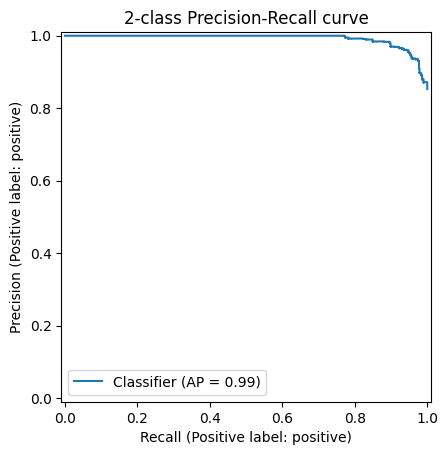

In [14]:
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach():
    probas = df['t5_embedding'].apply(lambda x: get_t5_sore(x))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')
    
    report = classification_report(df.sentiment, preds)
    print(report)
    
    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")
    
evaluate_embeddings_approach()

In [15]:
!pip list

Package                        Version
------------------------------ --------------
aiofiles                       22.1.0
aiosqlite                      0.20.0
annotated-types                0.6.0
anyio                          4.3.0
argon2-cffi                    23.1.0
argon2-cffi-bindings           21.2.0
arrow                          1.3.0
astroid                        3.1.0
asttokens                      2.4.1
attrs                          23.2.0
autopep8                       2.0.4
Babel                          2.14.0
beautifulsoup4                 4.12.3
bleach                         6.1.0
certifi                        2024.2.2
cffi                           1.16.0
charset-normalizer             3.3.2
comm                           0.2.2
contourpy                      1.2.1
cycler                         0.12.1
debugpy                        1.8.1
decorator                      5.1.1
defusedxml                     0.7.1
dill                           0.3.8
distro         